In [65]:
#Import the needed libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from google.colab import files
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler

In [68]:
df = pd.read_csv("coches_dataset2.csv.csv")

#the dataset came with some undefined boolean variables, so let´s erase them 
#because it will be impossible to use them, we´ll also erase the location region
#due to its illegibility
df = df.drop(["feature_0","feature_1", "feature_2", "feature_3", "feature_4",
              "feature_5", "feature_5", "feature_6", "feature_7", "feature_8", 
              "feature_8", "feature_9", "location_region"], axis = 1)

df.tail(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
38521,Chrysler,Neon,mechanical,green,260000,1995,gasoline,False,gasoline,2.0,sedan,False,owned,front,550.00,True,7,12,215
38522,Chrysler,PT Cruiser,automatic,other,207605,2004,gasoline,False,gasoline,2.4,hatchback,False,owned,front,4000.00,False,8,44,221
38523,Chrysler,Grand Voyager,mechanical,black,278000,1999,diesel,False,diesel,2.5,minivan,False,owned,front,4220.81,False,5,20,239
38524,Chrysler,300,automatic,silver,240000,2001,gasoline,False,gasoline,3.5,sedan,False,owned,front,3000.00,True,6,11,264
38525,Chrysler,Voyager,mechanical,violet,317000,1999,gas,True,gasoline,2.0,minivan,False,owned,front,3300.00,True,8,28,269
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,85,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,20,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,63,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,156,490
38530,Chrysler,Voyager,automatic,silver,297729,2000,gasoline,False,gasoline,2.4,minivan,False,owned,front,3200.00,True,4,73,632


In [69]:
#Get some more info about the variables in the dataframe:
df.info()

#Know if there is any null value:
df.isnull().values.any() 

#Now how many null values are there in the variable where there are null values:
print(df['duration_listed'].isnull().sum())
print(df['engine_capacity'].isnull().sum())
#There is 1 nan in "duration_listed" variable and 10 in engine_capacity.

#Fill nan´s with the mean average of the respective variable
df['duration_listed'].fillna((df['duration_listed'].mean()), inplace=True)
df['engine_capacity'].fillna((df['engine_capacity'].mean()), inplace=True)
#Recheck if there is any null value
print(df.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  number_of_photos   385

In [49]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Bin'] = pd.qcut(df["odometer_value"], 3)


df["Bin"] = le.fit_transform(df["Bin"])

df['Bin'] = pd.qcut(df["odometer_value"], 3)
bins = pd.qcut(df["odometer_value"], 3)

print(bins)
print(df.info())
print(df["Bin"])
bins2 = le.fit_transform(bins)
print(bins2)
df["Bin"] = le.fit_transform(bins)
df["Bin"]


0           (-0.001, 190000.0]
1         (190000.0, 300000.0]
2        (300000.0, 1000000.0]
3           (-0.001, 190000.0]
4         (190000.0, 300000.0]
                 ...          
38526     (190000.0, 300000.0]
38527    (300000.0, 1000000.0]
38528    (300000.0, 1000000.0]
38529       (-0.001, 190000.0]
38530     (190000.0, 300000.0]
Name: odometer_value, Length: 38531, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 190000.0] < (190000.0, 300000.0] <
                                           (300000.0, 1000000.0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer_name  38531 non-null  object  
 1   model_name         38531 non-null  object  
 2   transmission       38531 non-null  object  
 3   color              38531 non-null  object  
 4   odometer_value     38531 non-null  int64   
 

0        0
1        1
2        2
3        0
4        1
        ..
38526    1
38527    2
38528    2
38529    0
38530    1
Name: Bin, Length: 38531, dtype: int64

In [50]:
from sklearn import neighbors, datasets
from sklearn import preprocessing 
#in order to select some random cars:
import random
a=[]
#For this knn to work with a respectable accuracy, as it is done with quantiles,
#we need loads of cars of our dataset, notice that this implies  big computational cost.
n= 25000
for i in range(n):
    a.append(random.randint(1,len(df["Bin"])))
print('Randomised list is: ',a)




Randomised list is:  [24101, 13298, 7897, 25010, 22245, 30674, 30137, 33648, 24520, 12263, 34442, 27953, 37150, 34226, 24624, 17004, 14778, 15039, 20223, 10015, 35220, 20333, 29514, 6602, 21254, 29413, 1984, 1971, 4629, 23341, 25066, 26971, 9837, 33860, 24295, 2260, 24445, 10240, 33384, 16885, 18715, 11465, 31701, 4212, 22261, 24671, 37251, 27519, 33572, 13239, 12401, 36716, 5368, 1740, 13510, 30407, 30770, 22706, 37509, 14135, 3973, 33962, 34404, 8831, 4768, 4542, 33024, 29507, 24638, 13287, 10350, 4358, 18075, 17734, 7083, 20278, 1669, 34576, 36672, 463, 22895, 20773, 29944, 8444, 21201, 20748, 2776, 9556, 35190, 28834, 24774, 17393, 9613, 34716, 36129, 7913, 38471, 9831, 38383, 30834, 37518, 4068, 25430, 37569, 3075, 17697, 17283, 38471, 22096, 30721, 33932, 1159, 35274, 18753, 17840, 18563, 1138, 23410, 36143, 7249, 17013, 36694, 28517, 16424, 37426, 2259, 31565, 28605, 16607, 13871, 5918, 21599, 5568, 22209, 23180, 30979, 16778, 9669, 31580, 18907, 14972, 26291, 7629, 27897, 4695,

In [51]:
df["color"] = le.fit_transform(df["color"])
df["body_type"] = le.fit_transform(df["body_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["engine_fuel"] = le.fit_transform(df["engine_fuel"])
df["is_exchangeable"] = le.fit_transform(df["is_exchangeable"])
df["engine_fuel"] = le.fit_transform(df["engine_fuel"])
df["drivetrain"] = le.fit_transform(df["drivetrain"])
df["state"] = le.fit_transform(df["state"])
df["has_warranty"] = le.fit_transform(df["has_warranty"])
df["engine_type"] = le.fit_transform(df["engine_type"])
df["engine_has_gas"] = le.fit_transform(df["engine_has_gas"])

In [52]:
#Let´s select the variables that our classifier will take into account (all
# except brand, model and obviously the odometer value):
X =df.iloc[a,[2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
#Let´s get the values of our odometer_value_binned variable
y = df.iloc[a,19].values

split the training and testing data.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(np.unique(y_train))
print(X_test.shape)
print(np.unique(y_test))

(20000, 16)
[0 1 2]
(5000, 16)
[0 1 2]


Standarize the data and create the training and testing sets

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Let´s choose the best number of neighbors for our knn, based on the error that each amount produces, the least, the better.


Minimum error: 0.2758
K = 1


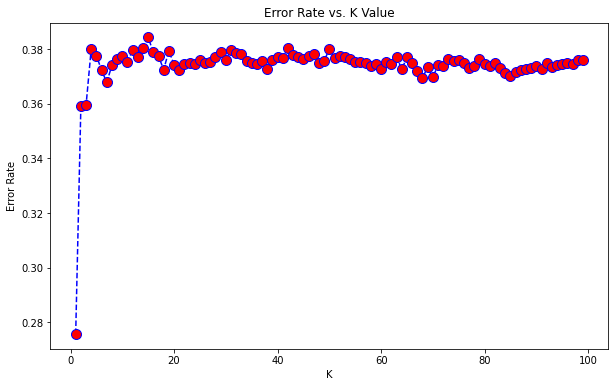

In [55]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,100):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate))
k = error_rate.index(min(error_rate))+1
print("K =",k)
#Here I will plot an error-k-neighbor plot that will help us a lot when it comes
#to decide the number of neighbors that will use in our knn

#ALERT: this plot may take a bit long due to the amount of data"

In [56]:
#Let´s set the amount of neighbors that our previous algorithm calculated for us
n_neighbors = k
classifier = KNeighborsClassifier(n_neighbors , weights='distance', algorithm = 'kd_tree')
classifier.fit(X_train, y_train)
classifier.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'distance'}

Print the prediction of the classifier over the test data

In [70]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 1]


Show the classification report and confusion matrix

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1624
           1       0.68      0.68      0.68      1801
           2       0.71      0.72      0.71      1575

    accuracy                           0.72      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.72      0.72      0.72      5000

[[1276  232  116]
 [ 236 1216  349]
 [ 114  332 1129]]


Plot the scatterplot with year and price as x and y axis

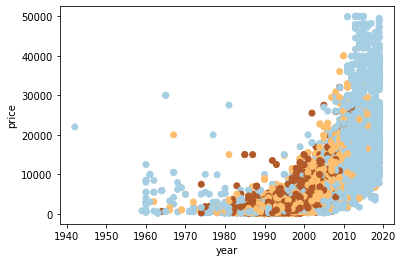

In [59]:
plt.scatter(df.iloc[a, 5], df.iloc[a, 14],c=y,cmap=plt.cm.Paired) # Note that we use the value of our class as the index of a colour in our colour map
plt.xlabel('year')
plt.ylabel('price')
plt.show()


Plot the scatterplot with engine capacity and number of photos as x and y axis

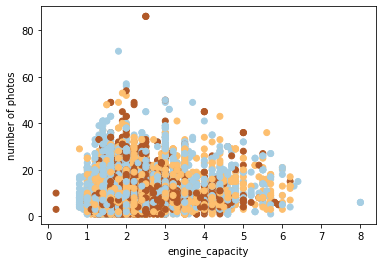

In [60]:
plt.scatter(df.iloc[a, 9], df.iloc[a, 16],c=y,cmap=plt.cm.Paired) # Note that we use the value of our class as the index of a colour in our colour map
plt.xlabel('engine_capacity')
plt.ylabel('number of photos')
plt.show()


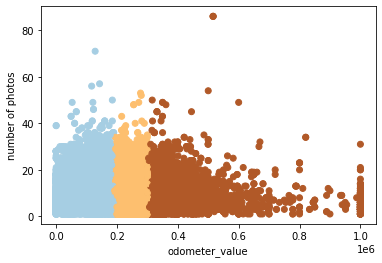

In [61]:
#So that you can see how is really classified plotted with the proper accuracy
plt.scatter(df.iloc[a, 4], df.iloc[a, 16],c=y,cmap=plt.cm.Paired) # Note that we use the value of our class as the index of a colour in our colour map
plt.xlabel('odometer_value')
plt.ylabel('number of photos')
plt.show()

In [62]:
#Let´s create a car with a value for each argument so that we can see
#What section of number of kilometers does the classifier predict
df.info()
transmission = df["transmission"].mean()
color = df["color"].mean()       
year_produced  = df["year_produced"].mean()
engine_fuel = df["engine_fuel"].mean()               
engine_has_gas = df["engine_has_gas"].mean()            
engine_type = df["engine_type"].mean() 
engine_capacity = df["engine_capacity"].mean()        
body_type = df["body_type"].mean()            
has_warranty  = df["has_warranty"].mean()            
state = df["state"].mean()               
drivetrain  = df["drivetrain"].mean()                   
price_usd  = df["price_usd"].mean()               
is_exchangeable = df["is_exchangeable"].mean()             
number_of_photos = df["number_of_photos"].mean()             
duration_listed = df["duration_listed"].mean() 
up_counter = df["up_counter"].mean()
  


pred_class = classifier.predict([[transmission,color, year_produced, engine_fuel, 
engine_has_gas, engine_type, engine_capacity, body_type, has_warranty, state, 
drivetrain, price_usd, is_exchangeable, number_of_photos,up_counter, duration_listed]])

print(pred_class)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  int64  
 3   color              38531 non-null  int64  
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  int64  
 7   engine_has_gas     38531 non-null  int64  
 8   engine_type        38531 non-null  int64  
 9   engine_capacity    38531 non-null  float64
 10  body_type          38531 non-null  int64  
 11  has_warranty       38531 non-null  int64  
 12  state              38531 non-null  int64  
 13  drivetrain         38531 non-null  int64  
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  int64  
 16  number_of_photos   385

In [63]:
print ("Train Accuracy : " + str(classifier.score(X_train, y_train)))

Train Accuracy : 1.0


In [64]:
print ("Test Accuracy : " + str(classifier.score(X_test, y_test)))

Test Accuracy : 0.7242


As we can see, the accuracy is not bad, but neither as good as in the KNN made using linspace for splitting the data.